In [26]:
import pandas as pd
import pickle
import requests
import json
import time
import numpy as np

# Load data

In [39]:
data_df = pd.read_pickle('./shopList.pkl')
data_df.head()

,0,1,2,3
0,00160cb5-9d9f-47fb-91ba-9e6f356cc9cf,22.299948,114.175194,女裝衫褲/女裝鞋/袋
1,001baf57-fd79-4aa3-b8c5-cc4b1ee90dc7,22.281746,114.127070,生活百貨/健康食品/素食
2,0023a0b8-7591-4558-bcd0-aff0d31dd766,22.300175,114.175360,銀器/珠寶首飾/飾物
3,003659e0-08eb-4d13-ad1a-22bcfa911a7c,22.358134,114.127658,玩具/主題精品/禮品/代購
4,00396213-e822-490d-880b-64704cdef0c5,22.452254,114.000403,日本菜


In [40]:
with open('./industries2tags.pkl', 'rb') as f:
    industries = pickle.load(f)

In [41]:
print (industries.keys(), '\n')

dict_keys(['餐飲', '食物零售', '服裝及配飾', '休閒娛樂', '醫療及保健', '美容及個人護理', '婚禮服務', '禮品、花卉及玩具', '音樂、攝影及藝術', '寵物', '家居', '影音電器', '工藝品及擺設', '運動及戶外活動', '興趣班', '教育及補習', '住宿', '交通及運輸', '宗教及節慶', '設計及製作', '商業及專業服務', '裝修及工程', '文儀印刷', 'App', '媒體專頁及其他']) 



In [42]:
print (industries['餐飲'])

['All day Breakfast', 'Cafe', '三文治', '上海菜', '串燒', '到會服務', '北京菜', '南美菜', '印尼菜', '印度菜', '台式飲品', '台灣菜', '四川菜', '墨西哥菜', '壽司刺身', '外賣店', '女僕Cafe', '客家菜', '小食店', '居酒屋', '廣東菜', '德國菜', '意大利菜', '意粉', '扒房', '拉麵', '放題或自助餐', '日本菜', '日韓燒肉', '星馬菜', '果汁', '法國菜', '泰國菜', '海鮮', '湯品', '漢堡包', '潮州菜', '火鍋', '烏冬', '熱狗', '燒臘', '牛肉飯', '甜品', '私房菜', '粥粉麵', '精品咖啡', '素食', '美國菜', '英國菜', '茶類飲品', '茶餐廳', '薄餅', '西式', '西班牙菜', '親子餐廳', '貓Cafe', '越南菜', '車仔麵', '酒吧', '酒精飲品', '雞煲', '雪糕', '韓國菜', '飲茶點心', '餃子', '麵包或蛋糕']


In [68]:
for idx, row in data_df.iterrows():
    data_df.loc[idx, 'industry'] = 'not_classified'
    catas = row[3].split('/')
    for industry in industries:
        if set(industries[industry]) & set(catas):
            data_df.loc[idx, 'industry'] = industry
            break



In [69]:
len(data_df)

3294

In [70]:
data_df[data_df['industry'] == 'not_classified']

,0,1,2,3,industry
257,101bcae9-736e-4746-8c8c-d9fa1e691657,22.355097,114.125120,轉運集運,not_classified
378,1a46662f-b55a-4f56-b2e8-2118096cfec0,22.314889,114.168804,語言班,not_classified
420,1db011d9-a8b6-4273-af52-9f1689b37645,22.309705,114.226488,轉運集運,not_classified
941,451824de-7c9a-4f2d-8106-70f79f19b523,22.316049,114.170323,漫畫店,not_classified
1037,4c4b2338-2dfa-4ae1-a2fd-e5e1e42c7409,22.281418,114.154911,俄羅斯菜,not_classified
1372,68eeed2e-8009-46cf-ae2e-f1eb6234af17,22.317442,114.170104,女僕cafe,not_classified
2077,9f3da21a-2752-4954-be3f-347a8cb80e55,22.310284,114.226558,刻字,not_classified
2274,aef607cc-cbdb-4702-ba76-c5c370b29d82,22.442811,114.031286,水族用品,not_classified
2442,bcb6aee1-05e2-4b12-8938-c9d30dd04b73,22.319810,114.187338,,not_classified
2444,bcbcd862-21df-4864-9b11-9c36880e0726,22.265117,114.236001,瑜珈,not_classified


In [73]:
data_df.groupby('industry').count()[0]


industry
not_classified      15
交通及運輸               19
休閒娛樂               182
住宿                  26
商業及專業服務             15
婚禮服務               138
媒體專頁及其他             29
宗教及節慶                6
家居                  50
寵物                  51
工藝品及擺設              20
影音電器                65
教育及補習               37
文儀印刷                11
服裝及配飾              371
禮品、花卉及玩具           110
美容及個人護理            288
興趣班                 73
裝修及工程               10
設計及製作               47
運動及戶外活動             70
醫療及保健               87
音樂、攝影及藝術            83
食物零售               163
餐飲                1328
Name: 0, dtype: int64

# Select restaurants

In [26]:
targetIdx = []
for idx, row in data_df.iterrows():
    tags = row[3].split('/')
    for tag in tags:
        if tag in industries['餐飲']:
            targetIdx+=[idx]
            break
target_df = data_df.iloc[targetIdx]
print(len(target_df))
target_df.head()

1328


,0,1,2,3
1,001baf57-fd79-4aa3-b8c5-cc4b1ee90dc7,22.281746,114.127070,生活百貨/健康食品/素食
4,00396213-e822-490d-880b-64704cdef0c5,22.452254,114.000403,日本菜
5,004502c9-ed26-44d3-a337-8ce544b114bf,22.282062,114.183563,日本菜/拉麵
6,00495684-257f-41dc-ae13-3875d9dcf6bb,22.312401,114.225222,素食/車仔麵/小食店/到會服務/賀年食品
7,00562a30-be70-4838-916f-a46a89eb54dd,22.379667,114.271421,西式/Cafe/All day Breakfast/甜品/雪糕


# Select those near Tsuen Wan

In [27]:
twCoord = 22.3707241,114.0862009

# Construct a KML file 

In [28]:
kmlCore = """
<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2">
  <Document>
    <name>%s</name>
    <Style id="icon-1502-F9A825-normal">
      <IconStyle>
        <color>ff25a8f9</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
      </IconStyle>
      <LabelStyle>
        <scale>0</scale>
      </LabelStyle>
    </Style>
    <Style id="icon-1502-F9A825-highlight">
      <IconStyle>
        <color>ff25a8f9</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
      </IconStyle>
      <LabelStyle>
        <scale>1</scale>
      </LabelStyle>
    </Style>
    <StyleMap id="icon-1502-F9A825">
      <Pair>
        <key>normal</key>
        <styleUrl>#icon-1502-F9A825-normal</styleUrl>
      </Pair>
      <Pair>
        <key>highlight</key>
        <styleUrl>#icon-1502-F9A825-highlight</styleUrl>
      </Pair>
    </StyleMap>
    <Style id="icon-1577-FF5252-normal">
      <IconStyle>
        <color>ff5252ff</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
      </IconStyle>
      <LabelStyle>
        <scale>0</scale>
      </LabelStyle>
    </Style>
    <Style id="icon-1577-FF5252-highlight">
      <IconStyle>
        <color>ff5252ff</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
      </IconStyle>
      <LabelStyle>
        <scale>1</scale>
      </LabelStyle>
    </Style>
    <StyleMap id="icon-1577-FF5252">
      <Pair>
        <key>normal</key>
        <styleUrl>#icon-1577-FF5252-normal</styleUrl>
      </Pair>
      <Pair>
        <key>highlight</key>
        <styleUrl>#icon-1577-FF5252-highlight</styleUrl>
      </Pair>
    </StyleMap>
    <Style id="icon-1899-0288D1-normal">
      <IconStyle>
        <color>ffd18802</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
        <hotSpot x="32" xunits="pixels" y="64" yunits="insetPixels"/>
      </IconStyle>
      <LabelStyle>
        <scale>0</scale>
      </LabelStyle>
    </Style>
    <Style id="icon-1899-0288D1-highlight">
      <IconStyle>
        <color>ffd18802</color>
        <scale>1</scale>
        <Icon>
          <href>https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png</href>
        </Icon>
        <hotSpot x="32" xunits="pixels" y="64" yunits="insetPixels"/>
      </IconStyle>
      <LabelStyle>
        <scale>1</scale>
      </LabelStyle>
    </Style>
    <StyleMap id="icon-1899-0288D1">
      <Pair>
        <key>normal</key>
        <styleUrl>#icon-1899-0288D1-normal</styleUrl>
      </Pair>
      <Pair>
        <key>highlight</key>
        <styleUrl>#icon-1899-0288D1-highlight</styleUrl>
      </Pair>
    </StyleMap>
    %s
  </Document>
</kml>
"""

In [29]:
star = """
<Placemark>
      <name>%s</name>
      <description>%s</description>
      <styleUrl>#icon-1502-F9A825</styleUrl>
      <Point>
        <coordinates>
          %s,%s,0
        </coordinates>
      </Point>
    </Placemark>
"""
default = """
<Placemark>
      <name>點3-default</name>
      <description>點3-default-說明</description>
      <styleUrl>#icon-1899-0288D1</styleUrl>
      <Point>
        <coordinates>
          %s,%s,0
        </coordinates>
      </Point>
    </Placemark>

"""
food = """
<Placemark>
      <name>%s</name>
      <description>%s</description>
      <styleUrl>#icon-1577-FF5252</styleUrl>
      <Point>
        <coordinates>
          %s,%s,0
        </coordinates>
      </Point>
    </Placemark>
"""

In [31]:
kmlBiteList = []
for idx, row in target_df.iterrows():
    kmlBiteList += [food%(row[0], row[3], row[2], row[1])]

In [32]:
kmlPointSection = ''.join(kmlBiteList)

In [33]:
print(kmlBiteList[0])


<Placemark>
      <name>001baf57-fd79-4aa3-b8c5-cc4b1ee90dc7</name>
      <description>生活百貨/健康食品/素食</description>
      <styleUrl>#icon-1577-FF5252</styleUrl>
      <Point>
        <coordinates>
          114.1270698,22.281746,0
        </coordinates>
      </Point>
    </Placemark>



In [34]:
kml = kmlCore%('full list (will sort out what they are later)', kmlPointSection)

In [35]:
with open('./fullList.kml', 'w') as f:
    f.write(kml)

In [36]:
foodID = '80fb6857-f53a-4cb2-9948-4bbdd9932cb1'
url = 'http://hkshoplist.com/api/getShopDetails.php?from=maps&id=%s'%foodID
res = requests.get(url)

In [38]:
fail_df = dict(foodID = [], reason = [], status_code=[], res = [])
failCounter = 0
foodDetails = []
for idx, row in target_df.iterrows():
    break
    
    print(idx, end='   /r')
    time.sleep(0.5)
    
    foodID = row[0]
    url = 'http://hkshoplist.com/api/getShopDetails.php?from=maps&id=%s'%foodID
    res = requests.get(url)
    
    if not res.ok:
        fail_df['foodID']= foodID
        fail_df['reason']= res.reason
        fail_df['status_code']= res.status_code
        fail_df['res'] = res
        failCounter += 1
        if failCounter>5:
            print('failed 5 times in a row. stoped')
            break
        continue
    failCounter = 0
    try: 
        foodDetails += res.json()
    except:
        print ('errors in %s'%foodID)
    
foodDetails_df = pd.DataFrame(foodDetails)  

In [45]:
foodDetails_df.head()
if len(foodDetails_df): 
    #foodDetails_df.to_pickle('./shopListDetails.pkl')
    pass

In [46]:
foodDetails_df = pd.read_pickle('./shopListDetails.pkl')
foodDetails_df

,num,BRAND,SUBCATEGORIES,SUB_DISTRICT,ADDRESS,CONTACT,TIME,Facebook,Instagram,Homepage,Evidence,Evidence_link
0,001baf57-fd79-4aa3-b8c5-cc4b1ee90dc7,Slowood,生活百貨/健康食品/素食,西營盤,西營盤爹核士街11號浚峯地下1-3地舖,28180203,星期一至四10:00-22:00\n星期五至六10:00-23:00\n星期日10:00-2...,Slowood.hk,slowood.hk,https://slowood.hk,"12/6, 5/8, 12/11參與罷市",https://www.facebook.com/Slowood.hk/photos/515...
1,00396213-e822-490d-880b-64704cdef0c5,櫻花樹下,日本菜,天水圍,天水圍天湖路1號嘉湖新北江商場1樓C41C號舖,64204555,/,,,,11/11-12/11罷市,https://ibb.co/LY71W7y
2,004502c9-ed26-44d3-a337-8ce544b114bf,博多拉麵別天神,日本菜/拉麵,銅鑼灣,銅鑼灣告士打道277號地下3A號舖,34882693,"星期一至日12:00-15:30,18:00-00:30",ramenbetsu,ramen_betsu,https://www.ramenbetsu.com/wp/,"5/8參與罷市,所有惠顧送rfid卡套,學生半價優惠",https://www.instagram.com/p/B3W1qfrgqe9/
3,00495684-257f-41dc-ae13-3875d9dcf6bb,素悅軒,素食/車仔麵/小食店/到會服務/賀年食品,荃灣,荃灣兆和街25號海晴軒15號舖,34864428,星期一至日12:00-21:00,SoYuetHin,,,"5/8罷市並開放休息, 14/11罷市, 每賣一張學生飯券送出多一張",https://www.facebook.com/SoYuetHin/posts/85816...
4,00562a30-be70-4838-916f-a46a89eb54dd,一起果醬Let's Jam Bistro,西式/Cafe/All day Breakfast/甜品/雪糕,西貢,西貢市場街9號地下,39565646,星期一至四12:00-22:30\n星期五12:00-23:00\n星期六或公眾假期前夕11...,Lets-Jam-一起果醬-592839210780646,letsjam_,https://letsjam.hk/,"武漢肺炎期間暫不招待內地人,捐款予星火,店舖連儂牆,長期發帖及多次罷市支持遊行",https://www.facebook.com/592839210780646/photo...
...,...,...,...,...,...,...,...,...,...,...,...,...
1323,fe4423e2-cc9a-454b-9129-9716a3d46efc,梔子,Cafe/西式/甜品/果汁/茶葉,尖沙咀,尖沙咀山林道8號地舖,27781628,星期一至日12:00-00:00,cafezi.official,cafezi.official,,"12/6, 5/8, 11/11, 13/11罷市",https://www.instagram.com/p/B0tHi7KB5gk/
1324,ff737146-6a1e-4d2b-b052-adf4d24dc815,廿一由八 Twenty One From Eight,精品咖啡/麵包或蛋糕/Cafe,觀塘,觀塘鴻圖道59號鵬光大廈11樓,23211738,星期一全日休息\n星期二至日12:00-18:30,twentyonefromeight,twenty_one_from_eight,https://www.twentyonefromeight.com/,"12,6 5/8罷市",https://www.facebook.com/twentyonefromeight/ph...
1325,ff73eea0-c0c5-42d4-88bc-08f5ea8e72b1,Hidden Kitchen,西式/素食/三文治/All Day Breakfast/果汁/Cafe/即食食品,紅磡,紅磡北拱街8號薈點1樓3室,62335127,星期三至四10:30-20:00\n星期五至日10:30-22:00,hiddenkitchenhk,hiddenkitchenhk,,"16/6,5/8,11-13/11罷市",https://www.facebook.com/hiddenkitchenhk/photo...
1326,ff797b32-3945-43de-9c3e-0f14bccd7deb,窩子 WoZi,西式/精品咖啡,新蒲崗,新蒲崗仁愛街36號地下,27960001,星期三至一12:00-22:00\n星期二全日休息,wozi.cafe,wozi.cafe,,"5/8, 11/11罷市",https://www.facebook.com/wozi.cafe/photos/2607...


In [ ]:
kmlBiteList = []
for idx, row in target_df.iterrows():
    
    details = foodDetails_df[foodDetails_df['num']==row[0]].iloc[0]
    des = '<br>'.join([details['CONTACT'], details['ADDRESS'], details['SUBCATEGORIES']])
    name = details['BRAND']
    name = '<![CDATA[%s]]>'%name
    des = '<![CDATA[%s]]>'%des
    kmlBiteList += [food%(name, des, row[2], row[1])]

    
kmlPointSection = ''.join(kmlBiteList)

In [ ]:
kml = kmlCore%('full list', kmlPointSection)
with open('./fullList.kml', 'w') as f:
    f.write(kml)

In [ ]:
print(kmlBiteList[0])

In [ ]:
details['BRAND']

In [ ]:
foodDetails_df['BRAND']

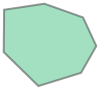

In [60]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
polygonTxtTW = """114.1050623,22.3767004,0
              114.1049765,22.3675332,0
              114.1124867,22.360191,0
              114.1217135,22.3630485,0
              114.125018,22.3688428,0
              114.1221426,22.3750337,0
              114.1137741,22.37801,0
              114.1050623,22.3767004,0"""
polygonTxtTW = polygonTxtTW.replace(' ', '').split('\n')
polygonTW = []
for XY in polygonTxtTW:
    X,Y,Z = XY.split(',')
    polygonTW += [(float(X), float(Y))]
polygonTW = Polygon(polygonTW)
polygonTW

In [76]:
inTW = []
for idx, row in target_df.iterrows():
    shopLoc = Point(row[2], row[1])
    if polygonTW.contains(shopLoc):
        inTW += [idx]

In [82]:
TWshopList = []
shopIDinTW = target_df.loc[inTW,:]
for idx, row in shopIDinTW.iterrows():
    shopID = row[0]
    
    TWshopList += [foodDetails_df[foodDetails_df['num'] == shopID]]

In [87]:
TWshopList = pd.concat(TWshopList)

In [88]:
TWshopList.to_csv('./twShopList.csv')